In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from codec import ImageCompressor
import warnings
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from PIL import Image
import os

In [3]:
# ver con optuna para mejorar la busqueda
n_values = [(2**4, 2**4), (2**4, 2**5), (2**5, 2**5),
            (2**4, 2**6), (2**3, 2**7), (2**3, 2**5),
            (2**6, 2**6), (2**5, 2**6), (2**3, 2**6)
            ]

In [4]:
lena_size = os.path.getsize("lena.png")
lena_size

473831

In [9]:
results = {}
a_cols = 256
fif_version = 2
magic_number = b'FIF'  # Ensure this is a bytes object
header_format = '3sBiiBBBBB'
v_format_precision = "f" 
max_error = 0.1 # no se usa
min_sparcity_range = range(10,151,20)

for min_n, max_n in n_values:
    
    results[min_n, max_n] = {}
    results[min_n, max_n]["min_sparcity_range"] = min_sparcity_range
    
    compression_rates = []
    results[min_n, max_n]["compression_rates"] = compression_rates
    
    ssim_values = []
    results[min_n, max_n]["ssim_values"] = ssim_values
        
    for min_sparcity in min_sparcity_range:
        print("min_sparcity",min_sparcity)
        
        #ENCODE
        newCodec = ImageCompressor(min_sparcity,
                                   min_n,
                                   max_n,
                                   a_cols,
                                   fif_version,
                                   magic_number,
                                   header_format,
                                   v_format_precision,
                                   max_error
                                  )
        with warnings.catch_warnings():
            # Following RuntimeWarning ignored:
            # Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary.
            # The requested precision might not have been met.
            warnings.simplefilter("ignore", RuntimeWarning)    
            newCodec.encode(input_file = 'lena.png',
                            output_file = 'lena_compressed.fif'
                            )

        # DECODE
        newCodec.decode(input_file = 'lena_compressed.fif',
                        output_file = 'lena_reconstructed.png'
                        )
        
        # COMPRESSION RATE
        # ver size inicial
        compression_rate = lena_size / newCodec.non_zero_coefs
        compression_rates.append(compression_rate)
        print(f"Compression rate: {compression_rate}")

        # CALCULATE SSIM
        image1 = img_as_float(io.imread('lena.png', as_gray=True))
        image2 = img_as_float(io.imread('lena_reconstructed.png', as_gray=True))
        ssim_index, _ = ssim(image1,
                             image2,
                             full=True,
                             data_range=image1.max() - image1.min()
                             )
        ssim_values.append(ssim_index)
        print(f"SSIM Index: {ssim_index}\n")

min_sparcity 10
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: lena_reconstructed.png
Compression rate: 1.2482343302572965
SSIM Index: 0.9288862771362408

min_sparcity 30
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: lena_reconstructed.png
Compression rate: 1.2482343302572965
SSIM Index: 0.9288862771362408

min_sparcity 50
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: lena_reconstructed.png
Compression rate: 1.2482343302572965
SSIM Index: 0.9288862771362408

min_sparcity 70
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: lena_reconstructed.png
Compression rate: 1.2482343302572965
SSIM Index: 0.9288862771362408

min_sparcity 90
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: lena_reconstructed.png
Compression rate: 1.2482343302572965
SSIM Index: 0.9288862771362408

min_sparcity 110
bytes_written: 1919530
processed_blocks: 3072
Output file saved to: lena_reconstructed.png
Compression 

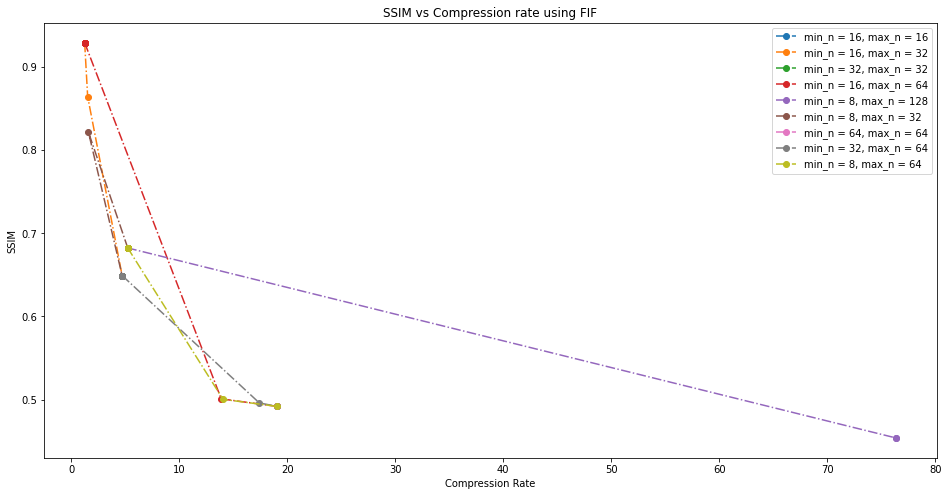

In [8]:
plt.figure(figsize=(16, 8))
for min_n, max_n in n_values:
    plt.plot(results[min_n, max_n]["compression_rates"], results[min_n, max_n]["ssim_values"],
             "o-.",label = f"min_n = {min_n}, max_n = {max_n}")
    plt.xlabel("Compression Rate")
    plt.ylabel("SSIM")
plt.legend()
plt.title("SSIM vs Compression rate using FIF")
plt.savefig('SSIM_vs_compression_rate_AQMP.png', dpi=300, bbox_inches='tight')
plt.show()

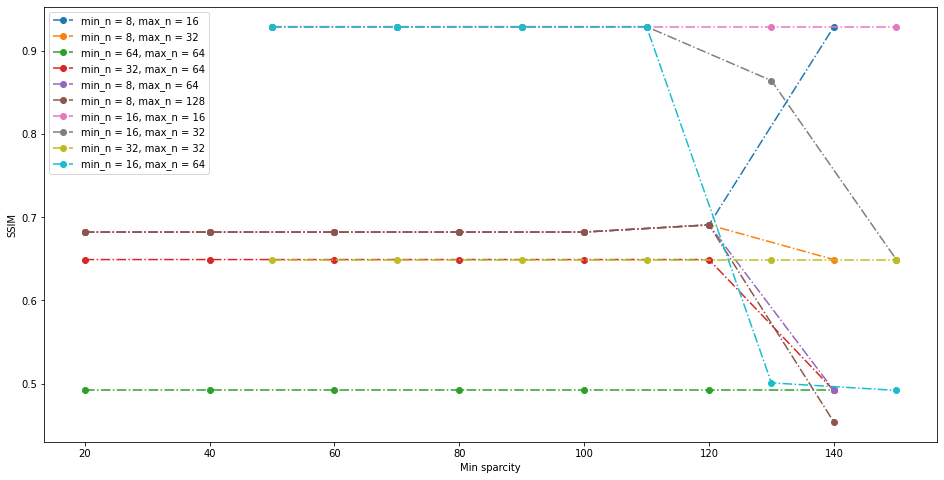

In [57]:
plt.figure(figsize=(16, 8))
for min_n, max_n in n_values:
    plt.plot([i for i in min_sparcity_range], results[min_n, max_n]["ssim_values"],
             "o-.",label = f"min_n = {min_n}, max_n = {max_n}")

for min_n, max_n in n_values2:
    plt.plot(results[min_n, max_n]["min_sparcity_range"], results[min_n, max_n]["ssim_values"],
             "o-.",label = f"min_n = {min_n}, max_n = {max_n}")

plt.xlabel("Min sparcity")
plt.ylabel("SSIM")
plt.legend()    
plt.show()

# Basis visualization

In [14]:
from basis import BasisFunctions

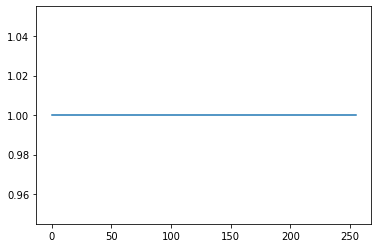

In [59]:
plt.plot(dct[:,0], label =f"{i}")

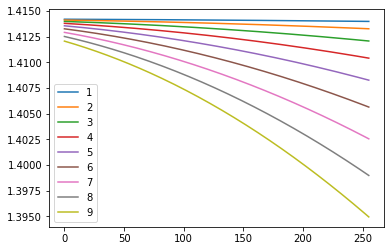

In [67]:
bf = BasisFunctions()
dct = bf.DCT1_qt(256,10)
for i in range(1,10):
    plt.plot(dct[:,i], label =f"{i}")
plt.legend()

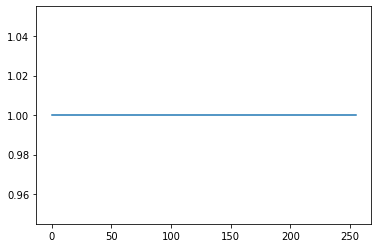

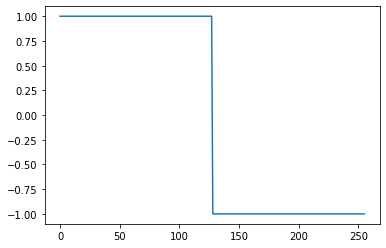

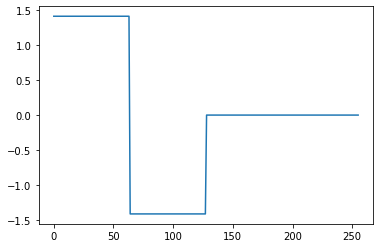

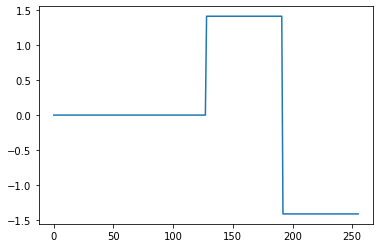

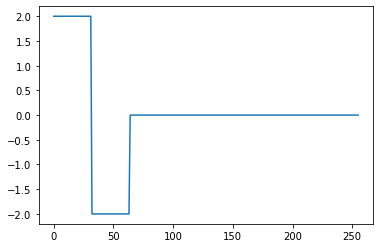

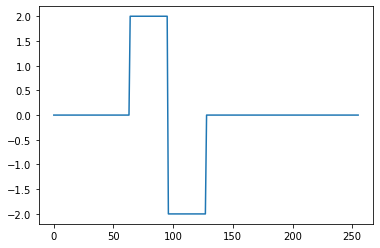

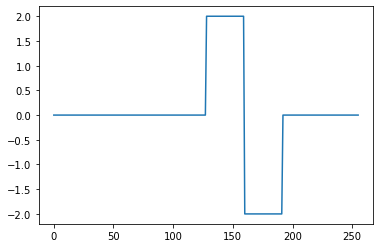

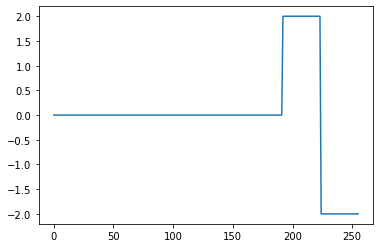

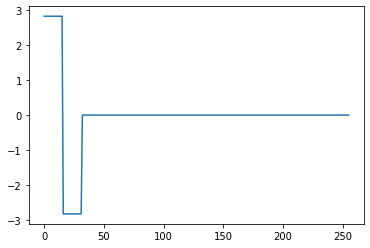

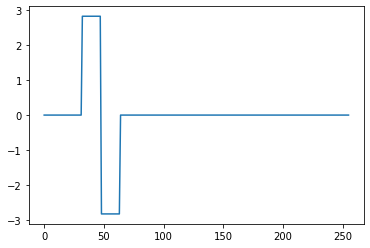

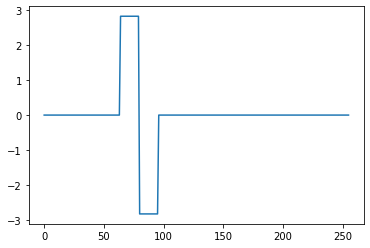

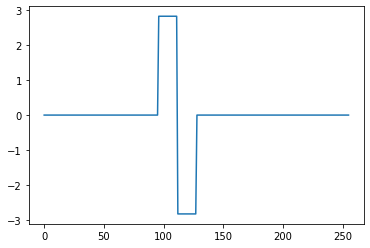

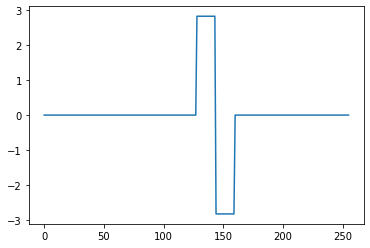

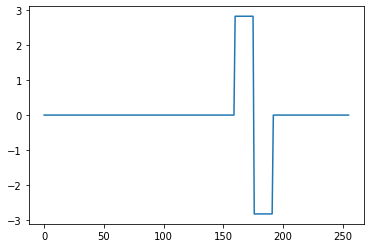

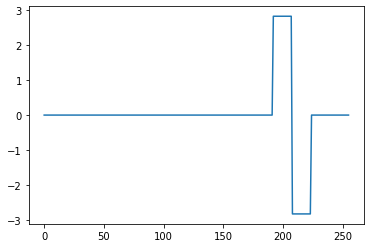

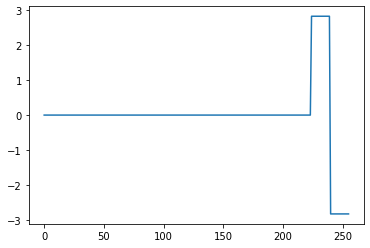

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


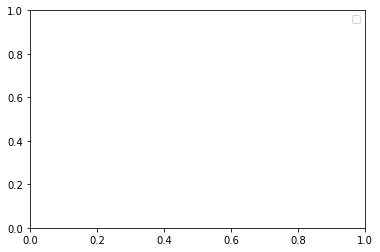

In [63]:
bf = BasisFunctions()
dct = bf.Haar1_qt(256,16)
for i in range(16):
    plt.plot(dct[:,i], label =f"{i}")
    plt.show()
plt.legend()